# LGMVIP - Data Science Internship

# Author - T Ompriya Subudhi

# Task 8: Next word Prediction

## Importing Libraries 

In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM
import pickle
from keras.optimizers import RMSprop

##  Loading the dataset

In [2]:
path = (r'C:\Users\acer\Downloads\1661-0.txt')
text = open(path,encoding="utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


###  Length of the dataset is 581888

In [3]:
tokenizer = RegexpTokenizer(r'\w+')        #split the dataset into each word using RegexpTokenizer
words = tokenizer.tokenize(text)

### Let's find the number of unique words present in given dataset. 

In [4]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

## Feature Engineering 

In [5]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [6]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool) #x for storing the features
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)         #  y for storing its corresponding label
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [7]:
print(X[0][0])

[False False False ... False False False]


## Building the Recurrent Neural network 

### LSTM model 

In [8]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

## Next Word Prediction Model

In [9]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

y = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=2, shuffle=True).history

C:\Users\acer\anaconda3\envs\tens\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/2
811/811 [==============================] - 816s 955ms/step - loss: 6.0203 - accuracy: 0.1051 - val_loss: 7.0044 - val_accuracy: 0.1045
Epoch 2/2
811/811 [==============================] - 739s 911ms/step - loss: 5.7841 - accuracy: 0.1474 - val_loss: 7.9693 - val_accuracy: 0.1098


In [11]:
model.save('keras_next_word_model.h5')                  #saving the model
pickle.dump(y, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

### Evaluating the model

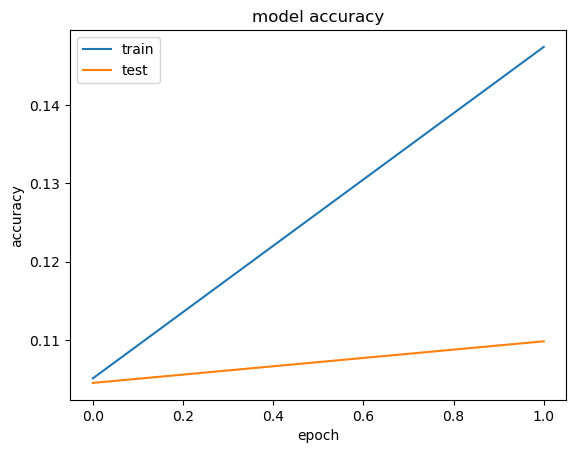

In [12]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

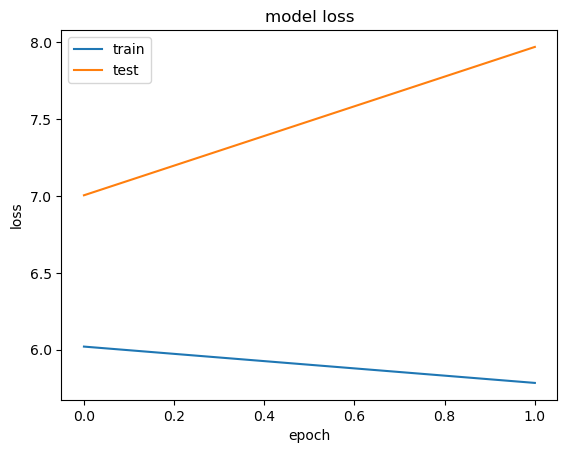

In [13]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Testing the model

In [14]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [15]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x
prepare_input("It is not a lack".lower())

it
is
not
a
lack


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [16]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [17]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [18]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

In [19]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [20]:
for q in quotes:
    print("original sentence: ",q)
    seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
    print("sequence: ",seq)
    print("next possible words: ", predict_completions(seq, 5))

original sentence:  It is not a lack of love, but a lack of friendship that makes unhappy marriages.
sequence:  it is not a lack
it
is
not
a
lack
next possible words:  ['of', 'to', 'in', 'that', 'it']
original sentence:  That which does not kill us makes us stronger.
sequence:  that which does not kill
that
which
does
not
kill
next possible words:  ['the', 'to', 'it', 'in', 'of']
original sentence:  I'm not upset that you lied to me, I'm upset that from now on I can't believe you.
sequence:  i m not upset that
i
m
not
upset
that
next possible words:  ['i', 'he', 'the', 'it', 'she']
original sentence:  And those who were seen dancing were thought to be insane by those who could not hear the music.
sequence:  and those who were seen
and
those
who
were
seen
next possible words:  ['in', 'the', 'with', 'at', 'upon']
original sentence:  It is hard enough to remember my opinions, without also remembering my reasons for them!
sequence:  it is hard enough to
it
is
hard
enough
to
next possible w

### Successfully we have created the next word prediction model with model accuracy 0.96.